# Libraries

In [8]:
import scipy
import mne
from scipy import signal
from sklearn.decomposition import FastICA, PCA
from scipy.signal import filtfilt, butter
from scipy.integrate import simps
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sstats
import seaborn as sns

# Data Collection and Data Preprocessing

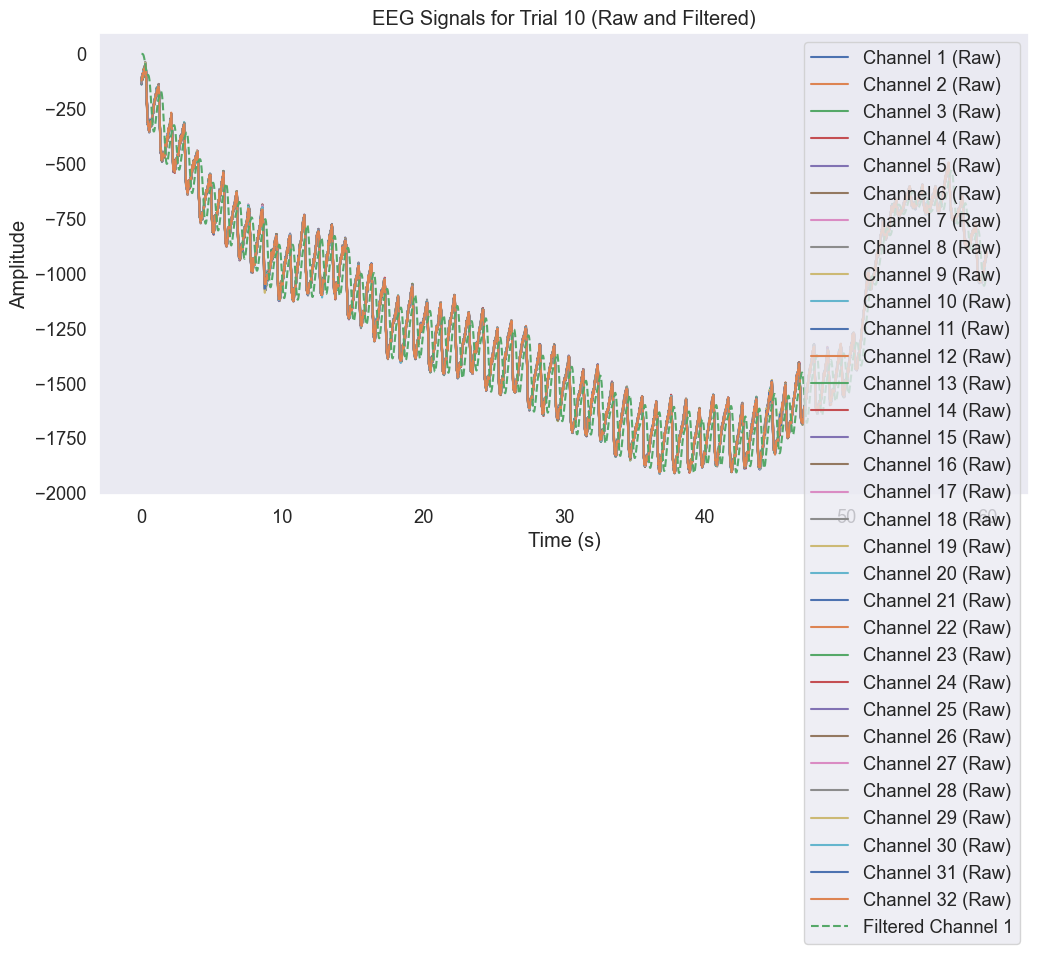

In [11]:
with open("s01.dat", "rb") as file: f = pickle.load(file, encoding='latin1')
Ntrial = 40
data = f['data']
labels = f['labels']
CAR_all = [] 
# Select a specific trial (e.g., trial 10)
trial_number = 10
trial = data[trial_number]

#Apllying CAR (Common Average Referencing)
Ctrial = trial - np.mean(trial, axis=0)
C_Baseline_EEG = Ctrial[0:32, 0:384]
C_EEG_Trial = Ctrial[0:32, 384:8064]
CAR_all.append(C_EEG_Trial)


# Filtering parameters
order = 5
sample_freq = 128
cutoff_freq = 2
sample_duration = 60
no_of_samples = sample_freq * sample_duration

# Create a time vector
time = np.linspace(0, sample_duration, no_of_samples, endpoint=False)

# Normalize the cutoff frequency
normalized_cutoff = 2 * cutoff_freq / sample_freq

# Design a Butterworth filter
b, a = scipy.signal.butter(order, normalized_cutoff, btype='low', analog=False)

# Apply the filter to each EEG channel separately
filtered_signal = np.zeros_like(C_EEG_Trial)
for channel in range(32): 
    filtered_signal[channel, :] = scipy.signal.lfilter(b, a, C_EEG_Trial[channel, :])
    
# Plot the raw EEG signals and the filtered signal
plt.figure(figsize=(12, 6))

# Plot raw EEG signals 
for channel in range(32):
    plt.plot(time, C_EEG_Trial[channel, :], label=f'Channel {channel + 1} (Raw)')

# Plot filtered signal 
filtered_channel = 0  # Choose a specific channel to plot
plt.plot(time, filtered_signal[filtered_channel, :], label=f'Filtered Channel {filtered_channel + 1}', linestyle='--')
plt.title(f'EEG Signals for Trial {trial_number} (Raw and Filtered)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()